<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#📽️Web-Scraping-Information-about-James-Bond's-Movies" data-toc-modified-id="📽️Web-Scraping-Information-about-James-Bond's-Movies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>📽️Web Scraping Information about James Bond's Movies</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Inspecting-website" data-toc-modified-id="Step-1:-Inspecting-website-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Step 1: Inspecting website</a></span></li><li><span><a href="#Step-2:-Access-Content-of-Website" data-toc-modified-id="Step-2:-Access-Content-of-Website-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Step 2: Access Content of Website</a></span><ul class="toc-item"><li><span><a href="#Extracting-Information-from-Website" data-toc-modified-id="Extracting-Information-from-Website-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Extracting Information from Website</a></span></li><li><span><a href="#Extracting-info-from-Table" data-toc-modified-id="Extracting-info-from-Table-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Extracting info from Table</a></span></li></ul></li></ul></li><li><span><a href="#🎶-Web-Scraping-Information-about-James-Bond's-Theme-Songs" data-toc-modified-id="🎶-Web-Scraping-Information-about-James-Bond's-Theme-Songs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>🎶 Web Scraping Information about James Bond's Theme Songs</a></span></li><li><span><a href="#🎶-Web-Scraping-Lyrics:-How-to-Access-Information-within-Hyperlinks" data-toc-modified-id="🎶-Web-Scraping-Lyrics:-How-to-Access-Information-within-Hyperlinks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>🎶 Web Scraping Lyrics: How to Access Information within Hyperlinks</a></span></li></ul></div>

**TO DO**

- Review and add text in section on how to retrieve info from hyperlinks
- Add missing songs


# Introduction

`Web scraping` is a valuable skill for a data scientist. It allows retrieving and parsing data stored on web pages across the Internet. 

Data may be not available through datasets or APIs, therefore web scraping might be the only way to obtain the data needed to answer our questions. Furthermore, web scraping give us the opportunity to acquire additional data that might give that extra boorst to our model. 

In a `business point of view`, web scraping help us making informed business decision. It provide an opportunity to:

* Know better competitors, their prices, services,
* Know customers, their behavior, their needs, what they think of product(s)/service(s),
* Stay well informed about partners,
* Gather public opinion about a company in general, as well as of its or similar product(s)/service(s),
* Obtain contact or other information of potential clients via social media and forums, so meaningfully resources can be directed towards this group of possible customers.

and the list goes on....

Also for `public/govermental organizations` web scraping can be very helpful. It might help gathering information from websites of different cities within an region about an important subject such as health, security, or environment. This data that sometimes are not easily collected across city agencies might be published by them on line. Therefore, this gives an opportunity to collect and analyze the data in order to extract beneficial insights to society.

In addition, data obtained via web scraping can be used for personal purposes and for fun! For instances, it can help you find your new home, a new recipe, material for your hobby, or information about your favorite subject, artist, movie, music.... again imagination is the limit.

Once you have your data, it is time to analyze and manipulate it using tools such as `pandas` and `numpy`.

Here, to illustrate the use of web scraping we've chosen a subject that probably will please everybody (or most of you): Movies and Music! On top of it we will be an opportunity to pay our respect to the first Jams Bond, [Sir Thomas Sean Connery](https://www.imdb.com/name/nm0000125/bio) that left us October 31, 2020.

Basically the following steps are taken:

📽️ Extract information about all the movies from James Bond from a table at [List_of_James_Bond_films](https://en.wikipedia.org/wiki/List_of_James_Bond_films)

🎶 Extract information about all the James Bond's theme songs from a table at [Lijst_van_titelsongs_uit_de_James_Bondfilms](https://nl.wikipedia.org/wiki/Lijst_van_titelsongs_uit_de_James_Bondfilms) 
("Yes! Dutch site the structure of the table was much easier. So if you have an option go to the easy one  😉 ")

🎶 Scrape lyrics of the theme songs that are not instrumental

To accomplish this we need a basic knowledge of `HTML` which means its tree structure and that tags define the branches where the information we search are. Furthermore, we make use of two Python libraries:

* [`requests`](https://requests.readthedocs.io/en/master/) which we allow us to get the webpage we want; and 
* [`Beautiful Soup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) that parses the content of the webpage and allows us extracting tags from an HTML document.

So let's start!

# 📽️Web Scraping Information about James Bond's Movies

## Step 1: Inspecting website

Every time we scrape a website we need to have an idea of its structure and where to find what we need.

For this, no matter which browser we use, we can access its code by right clicking and choosing to access it source code, i.e., `view page` (Firefox) or `view page source` (Chrome and Microsoft Edge). If you need details of an specific element right click on it and choose `inspect element`(Firefox) or `inspect` (Chrome and Microsoft Edge), instead.

Web pages use `HyperText Markup Language (HTML)` which is a markup language with its own syntax and rules. When a Web browser like Chrome or Firefox downloads a Web page, it reads the HTML to determine how to render it and display it to you.

HTML consists of **tags**. Anything in between the opening and closing of a tag is the content of that tag. 

Some of elements that often encountered are:

`<head>` : Contains metadata useful to the Web browser that's rendering the page and it is not visible to the user.

`<body>` : Contains represents the content of an HTML document with which the user interacts.

`<div>`: Section of the body.

`<p>`: Used for paragraphs. 

`<a>` : Creates a hyperlink to web pages, files, email addresses, locations in the same page, or anything else a URL can address.

For more definitions of elements check these links: [dev_mozilla](https://developer.mozilla.org/en-US/docs/Web/HTML/Element) or [w3s](https://www.w3schools.com/html/html_elements.asp)

While inspecting the website source code you will notice that some tags contain attributes which provide special instructions for the contents contained within that tag. Specific html attributes names are followed by equal sign, followed by information which being passed to that attribute within that tag.

For example:

`<div id="contentSub"></div>`

Try this when repository become public

<img src="https://github.com/dpbac/basics-web-scraping/blob/master/images/webpage_code_ex01.JPG"/ width="800" >

<img src="../images/webpage_code_ex01.JPG" width="800" />

## Step 2: Access Content of Website

For this we need to :

1. Access website using `requests`
2. Parse content with `Beautiful Soup` so we can extract what we need within tags

In [1]:
# importing packages

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
main_url = "https://en.wikipedia.org/wiki/List_of_James_Bond_films"

# Send request and catch response: r
response = requests.get(main_url)

# get the content of the response
content = response.content

# parse webpage
parser = BeautifulSoup(content, 'html.parser')

The parse is a BeautifulSoup object, which represents the document as a nested data structure.

In [3]:
parser;

We will need to perform the same process for our 2 next tasks, so let's build a function:

In [4]:
def parse_website(url):
    """ 
    Parse content of a website
    
    Args:
        url (str): url of the website of which we want to acess the content 
        
    Return:
        parser: representation of the document as a nested data structure.
    """
    
    # Send request and catch response
    response = requests.get(main_url)

    # get the content of the response
    content = response.content

    # parse webpage
    parser = BeautifulSoup(content, 'html.parser')
    
    return parser
    

### Extracting Information from Website

This part will depend on the structure of the website source code and of what you need as information from it.

Before going to our target (table with information about James Bond Films) let's see how we can access some text of the website.

In [5]:
main_url = "https://en.wikipedia.org/wiki/List_of_James_Bond_films"
parser = parse_website(main_url)

Now that we have the tree let's get the branches we want. To access the branches we use tags as attributes of parser. Therefore, to obtain the title of the webpage:

In [6]:
title = parser.title
title = title.text
title

'List of James Bond films - Wikipedia'

`Body` is the main branch of the HTML document where all elements such as paragraphs, hyperlinks are located. To access paragraphs we use tag `p`. If we use `find` the 1st paragraph is shown, if we use `find_all` we wil have acess to all paragraphs.

In [7]:
# body is with html element
body = parser.body
body;

In [8]:
# first paragraph
parser.body.find('p')

<p class="mw-empty-elt">
</p>

In [9]:
# all paragraphs

parser.body.find_all('p');

The method `find_all` returns a list and as one we can access an item using an index.

In [10]:
# find all paragraphs within the body of html
list_paragraphs = parser.body.find_all('p')
# extract the string within it
list_paragraphs = [p.text for p in list_paragraphs]
# show the first 2 paragraphs
list_paragraphs[:2]

['\n',
 "James Bond is a fictional character created by the novelist Ian Fleming in 1953. Bond is a British secret agent working for MI6 who also answers to his codename, ”007“.  He has been portrayed on film by the actors Sean Connery, David Niven, George Lazenby, Roger Moore, Timothy Dalton, Pierce Brosnan and Daniel Craig, in twenty-seven productions. All the films but two were made by Eon Productions. Eon now holds the full adaptation rights to all of Fleming's Bond novels.[1][2]\n"]

In [11]:
# text of the first non-empty paragraphy
print(parser.find_all('p')[1].text)

James Bond is a fictional character created by the novelist Ian Fleming in 1953. Bond is a British secret agent working for MI6 who also answers to his codename, ”007“.  He has been portrayed on film by the actors Sean Connery, David Niven, George Lazenby, Roger Moore, Timothy Dalton, Pierce Brosnan and Daniel Craig, in twenty-seven productions. All the films but two were made by Eon Productions. Eon now holds the full adaptation rights to all of Fleming's Bond novels.[1][2]



Or if you want all the text...

In [17]:
text_films = ' '.join(list_paragraphs).strip()
# First 2000 characters
print(text_films[:2000])

James Bond is a fictional character created by the novelist Ian Fleming in 1953. Bond is a British secret agent working for MI6 who also answers to his codename, ”007“.  He has been portrayed on film by the actors Sean Connery, David Niven, George Lazenby, Roger Moore, Timothy Dalton, Pierce Brosnan and Daniel Craig, in twenty-seven productions. All the films but two were made by Eon Productions. Eon now holds the full adaptation rights to all of Fleming's Bond novels.[1][2]
 In 1961 the producers Albert R. Broccoli and Harry Saltzman joined forces to purchase the filming rights to Fleming's novels.[3] They founded the production company Eon Productions and, with financial backing by United Artists, began working on Dr. No, which was directed by Terence Young and featured Connery as Bond.[4] Following Dr. No's release in 1962, Broccoli and Saltzman created the holding company Danjaq to ensure future productions in the James Bond film series.[5] The series currently encompasses twenty-f

### Extracting info from Table

You saw how to get some paragraphs, but what we really want as we said at the beginning is information about all movies and those are in the 1st table of the website.

The table information can be found under tag `tbody`.

In [13]:
len(parser.find_all('tbody'))

6

There are 6 tables in the website, but we are interested in the 1st one.

In [33]:
parser.tbody;

My goal is to build a dataframe so I'll get the header (name of the columns/features) and the data (values for each feature).

In [34]:
parser.tbody.find_all('th', scope="col")

[<th rowspan="2" scope="col">Title
 </th>,
 <th rowspan="2" scope="col">Year
 </th>,
 <th rowspan="2" scope="col">Bond actor
 </th>,
 <th rowspan="2" scope="col">Director
 </th>,
 <th class="unsortable" rowspan="2" scope="col"><span class="nowrap"><abbr title="References">Ref(s)</abbr></span>
 </th>,
 <th data-sort-type="number" scope="col">Actual $
 </th>,
 <th data-sort-type="number" scope="col">Adjusted 2005 $
 </th>,
 <th data-sort-type="number" scope="col">Actual $
 </th>,
 <th data-sort-type="number" scope="col">Adjusted 2005 $
 </th>,
 <th colspan="4" scope="col"><b>Total of Eon-produced films</b>
 </th>]

Our result is a list so we can use a list comprehension and apply some filtering to obtain the desired result.

In [35]:
# Obtain column names at the attribute col
list_col_01 = parser.tbody.find_all('th', scope="col")
list_col_01 = [item.text.strip() for item in list_col_01 if ('Ref' not in item.text) & ('Total' not in item.text)]
list_col_01

['Title',
 'Year',
 'Bond actor',
 'Director',
 'Actual $',
 'Adjusted 2005 $',
 'Actual $',
 'Adjusted 2005 $']

We need to add `Box office (millions)` and `Budget (millions)` before `Actual $` and `Adjusted 2005 $`.

In [36]:
parser.tbody.find_all('th', class_="unsortable")

[<th class="unsortable" colspan="2">Box office (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-0"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
 </th>,
 <th class="unsortable" colspan="2">Budget (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-1"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
 </th>,
 <th class="unsortable" rowspan="2" scope="col"><span class="nowrap"><abbr title="References">Ref(s)</abbr></span>
 </th>]

In [37]:
# Obtain complement of column names at the attribute unsortable and some manipulation so we can have the correct names
list_col_02 = parser.tbody.find_all('th', class_="unsortable")
list_col_02 = [item.text.strip().replace('[14]',"") for item in list_col_02 if ('Ref' not in item.text) & ('Total' not in item.text)]
list_col_02=list_col_02*2
list_col_02.sort()
list_col_02


['Box office (millions)',
 'Box office (millions)',
 'Budget (millions)',
 'Budget (millions)']

In [38]:
# Putting all together
list_columns = [list_col_01[idx] if idx in range(len(list_col_01[:4])) else list_col_02[idx-4] +' '+ list_col_01[idx] for idx in range(len(list_col_01)) ]
list_columns

['Title',
 'Year',
 'Bond actor',
 'Director',
 'Box office (millions) Actual $',
 'Box office (millions) Adjusted 2005 $',
 'Budget (millions) Actual $',
 'Budget (millions) Adjusted 2005 $']

Now that we have the name of features to be used to build our dataframe, let's find the values for each feature. 

If we continue checking the content within `tbody` we will notice that `film titles` are found under tag `th` with attribute `row` while the rest of the information is found under `td` with same attribute.

In [39]:
# Obtain title of the movies
list_films = parser.tbody.find_all('th', scope = "row")
list_films = [film.text.strip() for film in list_films]
list_films

['Dr. No',
 'From Russia with Love',
 'Goldfinger',
 'Thunderball',
 'You Only Live Twice',
 "On Her Majesty's Secret Service",
 'Diamonds Are Forever',
 'Live and Let Die',
 'The Man with the Golden Gun',
 'The Spy Who Loved Me',
 'Moonraker',
 'For Your Eyes Only',
 'Octopussy',
 'A View to a Kill',
 'The Living Daylights',
 'Licence to Kill',
 'GoldenEye',
 'Tomorrow Never Dies',
 'The World Is Not Enough',
 'Die Another Day',
 'Casino Royale',
 'Quantum of Solace',
 'Skyfall',
 'Spectre',
 'No Time to Die']

In [40]:
# Obtain all other information about those movies
list_info_films = [item.text.strip() for item in parser.tbody.find_all('td')]
list_info_films = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 8 != 7]
# showing the first 10 elements of the list
list_info_films[:10]

['1962',
 'Sean Connery',
 'Terence Young',
 '59.5',
 '448.8',
 '1.1',
 '7.0',
 '1963',
 'Sean Connery',
 'Terence Young']

In [41]:
# Organizing information in list_info_films by features
list_year_film = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 0 ]
list_actor = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 1 ]
list_director = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 2 ]
list_box_office_actual = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 3 ]
list_box_office_adj_2005 = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 4 ]
list_budget_actual = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 5 ]
list_budget_adj_2005 = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 6 ]

In [42]:
list_of_lists_films = [list_films, list_year_film, list_actor, list_director, list_box_office_actual, list_box_office_adj_2005, 
                 list_budget_actual, list_budget_adj_2005]


In [43]:
# Build a dictionary for our dataframe
dict_films = {list_columns[idx]:list_of_lists_films[idx] for idx in range(len(list_columns))}
# showing 2 items of the dictionary
dict(list(dict_films.items())[0:2])

{'Title': ['Dr. No',
  'From Russia with Love',
  'Goldfinger',
  'Thunderball',
  'You Only Live Twice',
  "On Her Majesty's Secret Service",
  'Diamonds Are Forever',
  'Live and Let Die',
  'The Man with the Golden Gun',
  'The Spy Who Loved Me',
  'Moonraker',
  'For Your Eyes Only',
  'Octopussy',
  'A View to a Kill',
  'The Living Daylights',
  'Licence to Kill',
  'GoldenEye',
  'Tomorrow Never Dies',
  'The World Is Not Enough',
  'Die Another Day',
  'Casino Royale',
  'Quantum of Solace',
  'Skyfall',
  'Spectre',
  'No Time to Die'],
 'Year': ['1962',
  '1963',
  '1964',
  '1965',
  '1967',
  '1969',
  '1971',
  '1973',
  '1974',
  '1977',
  '1979',
  '1981',
  '1983',
  '1985',
  '1987',
  '1989',
  '1995',
  '1997',
  '1999',
  '2002',
  '2006',
  '2008',
  '2012',
  '2015',
  '2021']}

In [44]:
df_films = pd.DataFrame(dict_films)
df_films.head()

,Title,Year,Bond actor,Director,Box office (millions) Actual $,Box office (millions) Adjusted 2005 $,Budget (millions) Actual $,Budget (millions) Adjusted 2005 $
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9


I'll rename column film to `Film Title` so we can use it when merging dataframes with film and music information.

In [45]:
df_films = df_films.replace("$","&#36")

In [46]:
df_films.rename(columns = {'Title': 'Film Title'}, inplace = True)

In [47]:
df_films.head()

,Film Title,Year,Bond actor,Director,Box office (millions) Actual $,Box office (millions) Adjusted 2005 $,Budget (millions) Actual $,Budget (millions) Adjusted 2005 $
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9


# 🎶 Web Scraping Information about James Bond's Theme Songs

For this task I've chosen the Dutch website because the structure of the table is simpler to extract the information we want and the information there is mostly in English.

Let's start by using our function to parse the content of the website.

In [29]:
main_url = "https://nl.wikipedia.org/wiki/Lijst_van_titelsongs_uit_de_James_Bondfilms"
# main_url = "https://en.wikipedia.org/wiki/James_Bond_music"
parser = parse_website(main_url)

The information we are looking for is again in the first table.

In [30]:
parser.find_all('tbody');

In [31]:
# Name of columns 
list_columns = parser.table.find_all('th')
list_columns = [item.text.strip() for item in list_columns]
list_columns

['Titelsong', 'Artiest', 'Film', 'Jaar', 'Componist']

or in English:

In [32]:
list_columns = ['Theme Song', 'Performer', 'Film Title', 'Year', 'Composer']

We have now the names of our 5 columns. Following, we will built the content of our table. 

In [33]:
list_table_songs = parser.tbody.find_all('td')
list_table_songs = [item.text.strip() for item in list_table_songs]
# showing the 1st 10 items of the list
list_table_songs[:10]

['James Bond Theme en  Kingston Calypso',
 'Orkest o.l.v. John Barry',
 'Dr. No',
 '1962',
 'Monty Norman & John Barry',
 'From Russia with Love',
 'Matt Monro',
 'From Russia with Love',
 '1963',
 'John Barry & Lionel Bart']

`<td>` is a html element that defines a cell of a table that contains data. As we can notice above every 5 rows (cells of the table) contains respectively, `Titelsong`, `Artiest`, `Film`, `Jaar`, `Componist`. Let's use this to build our dataframe with all title song of the James Bond film series.

In [34]:
list_title_songs = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 0 ]
list_performers = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 1 ]
list_films = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 2 ]
list_years = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 3 ]
list_composers = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 4 ]


In [35]:
list_of_lists_songs = [list_title_songs, list_performers, list_films, list_years, list_composers]


In [36]:
dict_songs = {list_columns[idx]:list_of_lists_songs[idx] for idx in range(len(list_columns))}

# showing 2 items of the dictionary
dict(list(dict_songs.items())[0:2])

{'Theme Song': ['James Bond Theme en  Kingston Calypso',
  'From Russia with Love',
  'Goldfinger',
  'Thunderball',
  'You Only Live Twice',
  "On Her Majesty's Secret Service",
  'Diamonds Are Forever',
  'Live and Let Die',
  'The Man with the Golden Gun',
  'Nobody Does It Better',
  'Moonraker',
  'For Your Eyes Only',
  'All Time High',
  'A View to a Kill',
  'The Living Daylights',
  'Licence to Kill',
  'GoldenEye',
  'Tomorrow Never Dies',
  'The World Is Not Enough',
  'Die Another Day',
  'You Know My Name',
  'Another Way to Die',
  'Skyfall',
  "Writing's On The Wall",
  'No Time to Die'],
 'Performer': ['Orkest o.l.v. John Barry',
  'Matt Monro',
  'Shirley Bassey',
  'Tom Jones',
  'Nancy Sinatra',
  'Orkest o.l.v. John Barry',
  'Shirley Bassey',
  'Paul McCartney & Wings',
  'Lulu',
  'Carly Simon',
  'Shirley Bassey',
  'Sheena Easton',
  'Rita Coolidge',
  'Duran Duran',
  'a-ha',
  'Gladys Knight',
  'Tina Turner',
  'Sheryl Crow',
  'Garbage',
  'Madonna',
  'Chri

In [37]:
df_songs = pd.DataFrame(dict_songs)
df_songs

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme en Kingston Calypso,Orkest o.l.v. John Barry,Dr. No,1962,Monty Norman & John Barry
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,Orkest o.l.v. John Barry,On Her Majesty's Secret Service,1969,John Barry
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager


Somethings need to be fixed here.

First, the first movie of the James Bond franchise, `Dr. No`, has two themes. However, we have information only about the performer of the 1st theme. In addition, formally [Monty Norman](https://en.wikipedia.org/wiki/James_Bond_Theme) is the composer of both James Bond theme and Kingston Calypso.

Second, in some items we find `o.l.v` that means in Dutch `onder leiding van` which we can translate to `led by`.

At last, the `Year` of the last film is 2021 as in the films table. The film was supposed to be released in 2020 but due to COVID it will be released in 2021.

In [38]:
df_songs['Theme Song'] = df_songs['Theme Song'].replace("James Bond Theme en Kingston Calypso","James Bond Theme / Kingston Calypso")
df_songs['Composer'].iloc[0] = 'Monty Norman / Byron Lee and the Dragonaires'

In [39]:
df_songs

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme en Kingston Calypso,Orkest o.l.v. John Barry,Dr. No,1962,Monty Norman / Byron Lee and the Dragonaires
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,Orkest o.l.v. John Barry,On Her Majesty's Secret Service,1969,John Barry
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager


In [40]:
# replace 'o.l.v.'' by 'led by'
df_songs['Performer'] = df_songs['Performer'].apply(lambda x : x.replace('o.l.v.','led by'))

In [41]:
# correct year of last move
df_songs['Year'].iloc[24] = '2021'

In [42]:
df_songs.head()

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme en Kingston Calypso,Orkest led by John Barry,Dr. No,1962,Monty Norman / Byron Lee and the Dragonaires
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse


To put all together let's check if columns `Film Title` in both films and songs dataframe are equal. Remember that the 1st movie has 2 entries in `df_songs`.

In [43]:
df_films['Film Title'].equals(df_songs['Film Title'])

True

In [44]:
df_films_songs = df_films.merge(df_songs, on = ['Film Title', 'Year'])

In [45]:
df_films_songs

,Film Title,Year,Bond actor,Director,Box office (millions) Actual $,Box office (millions) Adjusted 2005 $,Budget (millions) Actual $,Budget (millions) Adjusted 2005 $,Theme Song,Performer,Composer
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0,James Bond Theme en Kingston Calypso,Orkest led by John Barry,Monty Norman / Byron Lee and the Dragonaires
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6,From Russia with Love,Matt Monro,John Barry & Lionel Bart
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6,Goldfinger,Shirley Bassey,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,Thunderball,Tom Jones,John Barry & Don Black
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,You Only Live Twice,Nancy Sinatra,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,64.6,291.5,7.0,37.3,On Her Majesty's Secret Service,Orkest led by John Barry,John Barry
6,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7,Diamonds Are Forever,Shirley Bassey,John Barry & Don Black
7,Live and Let Die,1973,Roger Moore,Guy Hamilton,126.4,460.3,7.0,30.8,Live and Let Die,Paul McCartney & Wings,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,97.6,334.0,7.0,27.7,The Man with the Golden Gun,Lulu,John Barry & Don Black
9,The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,185.4,533.0,14.0,45.1,Nobody Does It Better,Carly Simon,Marvin Hamlisch & Carole Bayer Sager


Now that you have you data all together you can answer your questions. For instances:

❔ **Which actor performed James Bond more times?**

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, "Actors by Order of How Many Times They Performed 'James Bond'")

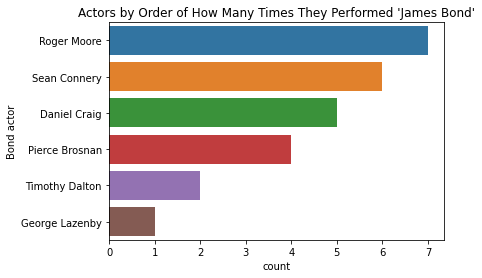

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(y=df_films_songs['Bond actor'], order = df_films_songs['Bond actor'].value_counts().index)
plt.title("Actors by Order of How Many Times They Performed 'James Bond'")

In [48]:
df_films_songs['Bond actor'].value_counts()

Roger Moore       7
Sean Connery      6
Daniel Craig      5
Pierce Brosnan    4
Timothy Dalton    2
George Lazenby    1
Name: Bond actor, dtype: int64

❔ **What was the Box Office and Budget?**

For this we need some cleaning first.

In [49]:
df_films_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Film Title                             25 non-null     object
 1   Year                                   25 non-null     object
 2   Bond actor                             25 non-null     object
 3   Director                               25 non-null     object
 4   Box office (millions) Actual $         25 non-null     object
 5   Box office (millions) Adjusted 2005 $  25 non-null     object
 6   Budget (millions) Actual $             25 non-null     object
 7   Budget (millions) Adjusted 2005 $      25 non-null     object
 8   Theme Song                             25 non-null     object
 9   Performer                              25 non-null     object
 10  Composer                               25 non-null     object
dtypes: object(11)
memory 

'Features Box office (millions) Actual \\$', 'Box office (millions) Adjusted 2005 \\$', 'Budget (millions) Actual \\$','Budget (millions) Adjusted 2005 \\$' are `object` type when they should be `float`. This happened because of `TBD` (meaning To Be Defines) and the values given as intervals in indexes 22 and 23 of 'Budget (millions) Actual \\$' and 'Budget (millions) Adjusted 2005 \\$'.

First, let's replace `TBD` by 0.00 since the film will be release in 2021.

Second, let's replace the interval of values by it's mean.

In [50]:
df_films_songs = df_films_songs.replace('TBD',0.00)

In [51]:
def calculate_mean(interval_str):
    """ Calculate mean of a and b where a and b are in the expression `a-b` (string) """
    
    interval_str = interval_str.replace('[b]','')
    
    a = float(interval_str.split('–')[0])
    b = float(interval_str.split('–')[1])
    
    return round((a + b/2),2)

In [52]:
df_films_songs.columns

Index(['Film Title', 'Year', 'Bond actor', 'Director',
       'Box office (millions) Actual $',
       'Box office (millions) Adjusted 2005 $', 'Budget (millions) Actual $',
       'Budget (millions) Adjusted 2005 $', 'Theme Song', 'Performer',
       'Composer'],
      dtype='object')

In [53]:
for idx in range(22,24):
    
    df_films_songs.loc[idx,'Budget (millions) Actual $'] = calculate_mean(df_films_songs.loc[idx,'Budget (millions) Actual $'])
    df_films_songs.loc[idx,'Budget (millions) Adjusted 2005 $'] = calculate_mean(df_films_songs.loc[idx,'Budget (millions) Adjusted 2005 $'])

In [54]:
df_films_songs

,Film Title,Year,Bond actor,Director,Box office (millions) Actual $,Box office (millions) Adjusted 2005 $,Budget (millions) Actual $,Budget (millions) Adjusted 2005 $,Theme Song,Performer,Composer
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0,James Bond Theme en Kingston Calypso,Orkest led by John Barry,Monty Norman / Byron Lee and the Dragonaires
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6,From Russia with Love,Matt Monro,John Barry & Lionel Bart
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6,Goldfinger,Shirley Bassey,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,Thunderball,Tom Jones,John Barry & Don Black
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,You Only Live Twice,Nancy Sinatra,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,64.6,291.5,7.0,37.3,On Her Majesty's Secret Service,Orkest led by John Barry,John Barry
6,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7,Diamonds Are Forever,Shirley Bassey,John Barry & Don Black
7,Live and Let Die,1973,Roger Moore,Guy Hamilton,126.4,460.3,7.0,30.8,Live and Let Die,Paul McCartney & Wings,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,97.6,334.0,7.0,27.7,The Man with the Golden Gun,Lulu,John Barry & Don Black
9,The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,185.4,533.0,14.0,45.1,Nobody Does It Better,Carly Simon,Marvin Hamlisch & Carole Bayer Sager


In [55]:
for col in ['Box office (millions) Actual $','Box office (millions) Adjusted 2005 $', 'Budget (millions) Actual $',
       'Budget (millions) Adjusted 2005 $']:
    
    df_films_songs[col] = df_films_songs[col].astype('float')

In [56]:
df_films_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Film Title                             25 non-null     object 
 1   Year                                   25 non-null     object 
 2   Bond actor                             25 non-null     object 
 3   Director                               25 non-null     object 
 4   Box office (millions) Actual $         25 non-null     float64
 5   Box office (millions) Adjusted 2005 $  25 non-null     float64
 6   Budget (millions) Actual $             25 non-null     float64
 7   Budget (millions) Adjusted 2005 $      25 non-null     float64
 8   Theme Song                             25 non-null     object 
 9   Performer                              25 non-null     object 
 10  Composer                               25 non-null     object 
dtypes: float

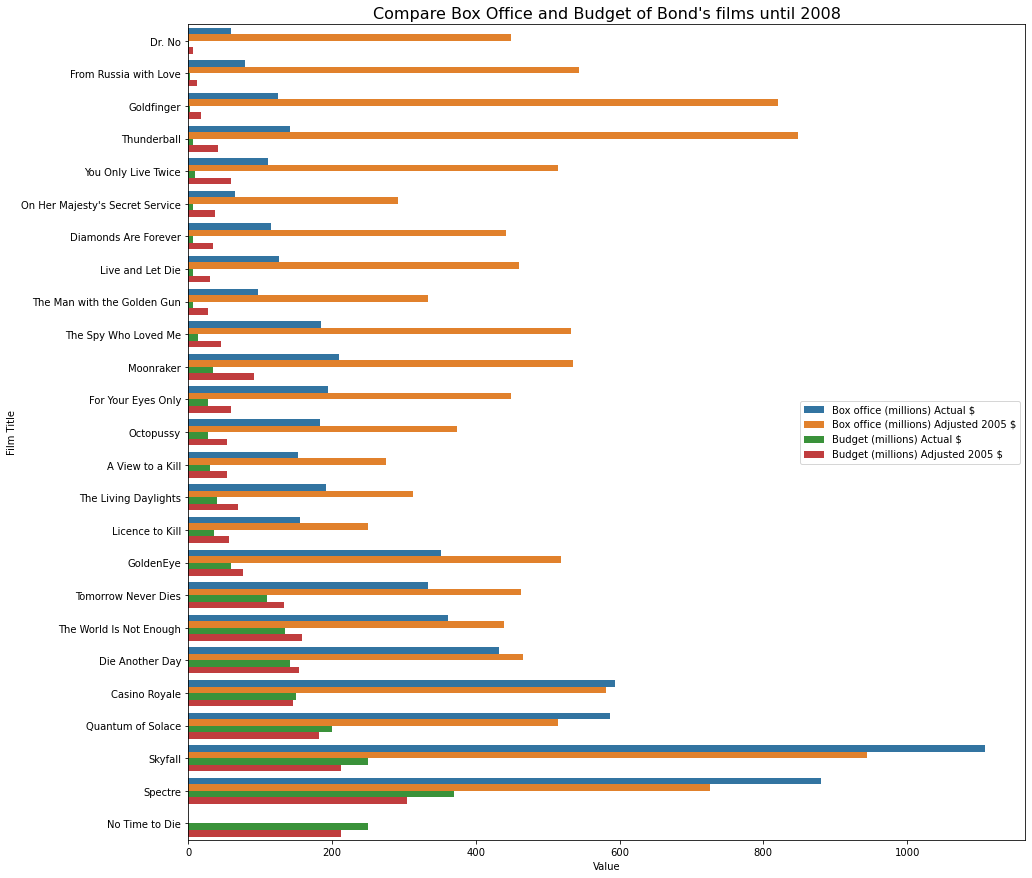

In [57]:
fig, ax1 = plt.subplots(figsize=(15, 15))
tidy = df_films_songs.melt(id_vars='Film Title',  value_vars=['Box office (millions) Actual $',
       'Box office (millions) Adjusted 2005 $', 'Budget (millions) Actual $',
       'Budget (millions) Adjusted 2005 $']).rename(columns=str.title)
sns.barplot(y='Film Title', x='Value', hue='Variable', data=tidy, ax=ax1)
plt.title("Compare Box Office and Budget of Bond's films until 2008", size=16)
plt.legend(loc = "center right", title = "")


❔ **Is there any performer that performed songs more than once?**

In [58]:
df_films_songs['Performer'].value_counts()[df_films_songs['Performer'].value_counts().values > 1].index[0]

'Shirley Bassey'

**Which songs and in which years she song?**

In [59]:
df_films_songs[['Theme Song','Year']][df_films_songs['Performer']=='Shirley Bassey']

,Theme Song,Year
2,Goldfinger,1964
6,Diamonds Are Forever,1971
10,Moonraker,1979


# 🎶 Web Scraping Lyrics: How to Access Information within Hyperlinks

To show how to scrape webpages within a webpage let's obtain lyrics of James Bond's theme songs.

Here we will build a dataframe with song titles, performers, and lyrics. 

In [60]:
main_url = "https://www.stlyrics.com/b/bestofbondjamesbond.htm"

In [61]:
parser = parse_website(main_url)

In [62]:
def retrieve_hyperlinks(main_url):
    """ 
    Find hyperlinks in 'main_url' 
    
    Args:
        main_url: Main webpage containing hyperlinks
        
    Return:
        list of url: list of hyperlinks from main_url
        
    """
    
    # Find all 'a' tags (which define hyperlinks): a_tags

    a_tags = parser.find_all('a')

    # Create a list with hyperlinks found

    list_links = [link.get('href') for link in a_tags]

    # Remove none values if there is some
    # Remove none values if there is some
    
    list_links = list(filter(None, list_links)) 
    
    return list_links

In [63]:
list_links = retrieve_hyperlinks(main_url)

In [64]:
list_links = list(set(list_links))

print('\n Number of links before filtering:', len(list_links))
list_links[:20]


 Number of links before filtering: 109


['https://www.twitter.com/stlyricscom',
 '/songs/r.html',
 '/p/palmsprings.htm',
 '/n.htm',
 '/lyrics/bestofbondjamesbond/anotherwaytodie.htm',
 '/songs/b.html',
 '/songs/n.html',
 '/dmca.htm',
 '/l/lovebirds.htm',
 '/b/bill%26tedfacethemusic.htm',
 '/e.htm',
 '/m.htm',
 '/lyrics/bestofbondjamesbond/foryoureyesonly.htm',
 '/lyrics/bestofbondjamesbond/goldeneye.htm',
 '/lyrics/bestofbondjamesbond/dieanotherday.htm',
 '/b/becoming.htm',
 '/h/hamiltonthemovie.htm',
 '/t/thefk-itlist.htm',
 '/lyrics/bestofbondjamesbond/fromrussiawithlove.htm',
 '/z.htm']

In [65]:
list_links = [link for link in list_links if 'bestofbondjamesbond' in link]
print('\n Number of links after filtering:', len(list_links))
list_links


 Number of links after filtering: 23


['/lyrics/bestofbondjamesbond/anotherwaytodie.htm',
 '/lyrics/bestofbondjamesbond/foryoureyesonly.htm',
 '/lyrics/bestofbondjamesbond/goldeneye.htm',
 '/lyrics/bestofbondjamesbond/dieanotherday.htm',
 '/lyrics/bestofbondjamesbond/fromrussiawithlove.htm',
 '/lyrics/bestofbondjamesbond/alltimehigh.htm',
 '/lyrics/bestofbondjamesbond/thelivingdaylights.htm',
 '/lyrics/bestofbondjamesbond/liveandletdie.htm',
 '/lyrics/bestofbondjamesbond/wehaveallthetimeintheworld.htm',
 '/lyrics/bestofbondjamesbond/onhermajestyssecretservice.htm',
 '/lyrics/bestofbondjamesbond/theworldisnotenough.htm',
 '/lyrics/bestofbondjamesbond/jamesbondtheme.htm',
 '/lyrics/bestofbondjamesbond/youonlylivetwice.htm',
 '/lyrics/bestofbondjamesbond/moonraker.htm',
 '/lyrics/bestofbondjamesbond/tomorrowneverdies.htm',
 '/lyrics/bestofbondjamesbond/diamondsareforever.htm',
 '/lyrics/bestofbondjamesbond/youknowmyname.htm',
 '/lyrics/bestofbondjamesbond/themanwiththegoldengun.htm',
 '/lyrics/bestofbondjamesbond/aviewtoakill

In [66]:
complete_urls = ["https://www.stlyrics.com"+link for link in list_links]
complete_urls

['https://www.stlyrics.com/lyrics/bestofbondjamesbond/anotherwaytodie.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/foryoureyesonly.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/goldeneye.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/dieanotherday.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/fromrussiawithlove.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/alltimehigh.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/thelivingdaylights.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/liveandletdie.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/wehaveallthetimeintheworld.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/onhermajestyssecretservice.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/theworldisnotenough.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/jamesbondtheme.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/youonlylivetwice.

In [67]:
lyric_url = complete_urls[0]

r_lyric = requests.get(lyric_url)
    
# obtain text with html containt of the url
html_doc_lyric = r_lyric.content
    
# making html easier to read
soup_lyric = BeautifulSoup(html_doc_lyric,"lxml")

lyric_list = soup_lyric.find_all('div', class_="highlight")
    
lyric_list=[item.text.strip() for item in lyric_list ]
    
# Remove none values if there is some
lyric_list = list(filter(None, lyric_list)) 

print('\n'.join(lyric_list))

(Feat. Alicia Keys)
I know the player
With the slick
Trigger finger
For Her Majesty
Another one
With the
Golden tone voice
And then your fantasy
Another bill
From a killer
Turned a thrill
Into a tragedy
Chorus
A door left open
A woman walking by
A drop in the water
A look in the eye
A phone on the table
A man on your side
Someone that you think
That you can trust is just
Another way to die
Another tricky little gun
Giving solace to the one
That will never see
The sunshine
Another inch of your life
Sacrificed
For your brother
In the nick of time
Another dirty money,
Heaven sent honey
Turning on a dime
Chorus
A door left open
A woman walking by
A drop in the water
A look in the eye
A phone on the table
A man on your side
Someone that you think
That you can
Trust is just
Another way to die
Wo-oh-oh-oh-oh-oah!
Oh-oh-oh-oh-oh-oh!
Oh-oh-oh-oh-oh-oh!
Oh-oh-oh-oh-oh-oh!
Another girl
With her finger
On the world singing?
Another gun thrown down
And surrendered
Took away your fear
Hey!
Another m

In [68]:
def extract_lyric_from_url(lyric_url):
    """ 
    Extract lyrics after prettify beautiful soup from /www.stlyrics.com
    
    Args: 
        lyric_url: url for lyric website
        
    Return:
        text of lyrics
    """
    
    
    # send a http request
    r_lyric = requests.get(lyric_url)
    
    # obtain text with html containt of the url
    html_doc_lyric = r_lyric.text
    
    # making html easier to read
    soup_lyric = BeautifulSoup(html_doc_lyric,"lxml")

    lyric_list = soup_lyric.find_all('div', class_="highlight")
    
    lyric_list=[item.text.strip() for item in lyric_list ]
    # Remove none values if there is some
    
    lyric_list = list(filter(None, lyric_list)) 

    return ' '.join(lyric_list)

In [69]:
list_lyrics = []
list_links = []

for link in complete_urls:
    list_lyrics.append(extract_lyric_from_url(link))
    list_links.append(link.split('/')[-1].replace('.htm',''))

In [70]:
len(list_links)

23

In [71]:
df_links = pd.DataFrame({'links':list_links, 'lyrics': list_lyrics})
df_links

,links,lyrics
0,anotherwaytodie,(Feat. Alicia Keys) I know the player With the...
1,foryoureyesonly,For your eyes only Can see me through the nigh...
2,goldeneye,See reflections on the water more than darknes...
3,dieanotherday,"I'm gonna wake up, yes and no I'm gonna kiss s..."
4,fromrussiawithlove,"From Russia with love I fly to you, much wiser..."
5,alltimehigh,All I wanted was a sweet distraction for an ho...
6,thelivingdaylights,"Hey driver, where're we going I swear my nerve..."
7,liveandletdie,When You Were Young And Your Heart Was An Open...
8,wehaveallthetimeintheworld,We have all the time in the world Time enough ...
9,onhermajestyssecretservice,I've got a secret I can't explain And all the ...


In [72]:
df_songs

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme en Kingston Calypso,Orkest led by John Barry,Dr. No,1962,Monty Norman / Byron Lee and the Dragonaires
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager


Before merging we need to split the first row which contain information about 2 theme songs. For this I'll append to the dataframe 2 new rows with information about each of the songs.

In [73]:
# Appending two new rows with updated information

df_songs = df_songs.append({'Theme Song':"James Bond Theme", 'Performer':'Orkest led by John Barry', 
                            'Film Title':'Dr. No', 'Year':'1962', 'Composer': 'Monty Norman'}, ignore_index=True)
df_songs = df_songs.append({'Theme Song': "Kingston Calypso (a.k.a 'Three Blind Mice')", 'Performer':"Byron Lee and the Dragonaires",
                            'Film Title':'Dr. No', 'Year':'1962', 'Composer': 'Monty Norman'}, ignore_index=True)

Then drop the old one and re-organize the dataframe.

In [74]:
# removing the incomplete info about Dr. No 
df_songs.drop_duplicates(subset=["Film Title","Performer"], keep='last', inplace=True)
# re-organize dataframe by Year
df_songs.sort_values('Year', inplace=True)
# reset index
df_songs.reset_index(drop=True, inplace=True)

In [75]:
df_lyrics = df_songs.copy()
df_lyrics

,Theme Song,Performer,Film Title,Year,Composer
0,Kingston Calypso (a.k.a 'Three Blind Mice'),Byron Lee and the Dragonaires,Dr. No,1962,Monty Norman
1,James Bond Theme,Orkest led by John Barry,Dr. No,1962,Monty Norman
2,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
3,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
4,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
5,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
6,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry
7,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
8,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
9,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black


In [76]:
df_lyrics['links'] = df_lyrics['Theme Song'].apply(lambda x: x.lower().replace(' ','').replace("'",''))

In [77]:
df_lyrics = df_lyrics.merge(df_links, on='links', how='outer')

In [78]:
df_lyrics

,Theme Song,Performer,Film Title,Year,Composer,links,lyrics
0,Kingston Calypso (a.k.a 'Three Blind Mice'),Byron Lee and the Dragonaires,Dr. No,1962,Monty Norman,kingstoncalypso(a.k.athreeblindmice),NaN
1,James Bond Theme,Orkest led by John Barry,Dr. No,1962,Monty Norman,jamesbondtheme,
2,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart,fromrussiawithlove,"From Russia with love I fly to you, much wiser..."
3,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse,goldfinger,"Goldfinger. He's the man, the man with the mid..."
4,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black,thunderball,He always runs while others walk. He acts whil...
5,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse,youonlylivetwice,"You only live twice, Or so it seems. One life ..."
6,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry,onhermajestyssecretservice,I've got a secret I can't explain And all the ...
7,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black,diamondsareforever,"Diamonds are forever, They are all I need to p..."
8,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney,liveandletdie,When You Were Young And Your Heart Was An Open...
9,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black,themanwiththegoldengun,He has a powerful weapon He charges a million ...


**TO CONTINUE**

Include information about https://en.wikipedia.org/wiki/We_Have_All_the_Time_in_the_World

1969 Bond film On Her Majesty's Secret Service,

https://www.songteksten.nl/songteksten/365987/louis-armstrong/we-have-all-the-time-in-the-world.htm

Adele (2012) : https://www.songteksten.nl/songteksten/362930/adele/skyfall.htm

Sam Smith (2015) - Spectre - https://www.songteksten.nl/artiest/131949/sam-smith.htm

Billie Eilish (2021) - No time to day - https://www.songteksten.nl/songteksten/1130189/billie-eilish/no-time-to-die.htm

https://www.flashlyrics.com/lyrics/monty-norman/kingston-calypso-75


Add extra songs.


In [79]:
# df_lyrics.dropna(inplace=True)

In [80]:
# df_lyrics